<a href="https://colab.research.google.com/github/DanielMerkdo/analitica_salud/blob/main/b_exploracion_limpieza_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación del notebook

## Cargar librerías

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import math


from scipy.stats import zscore, shapiro, kstest, anderson

In [70]:
import a_funciones as funciones     # Importar las funciones
import importlib
importlib.reload(funciones)

<module 'a_funciones' from '/content/drive/MyDrive/cod/analitica_salud/a_funciones.py'>

In [62]:
!pip install unidecode

In [63]:
# Eliminar Warnings
#import warnings
#warnings.filterwarnings("ignore")

In [64]:
# Instalar git en Colab si no está instalado
#!apt-get install git

## Conexion BD

In [3]:
# Montar drive y crear path para sys y para directorio de trabajo

from google.colab import drive
drive.mount('/content/drive')

import sys
import os

# Define el path al directorio de trabajo actual
path = "/content/drive/My Drive/cod/analitica_salud"


sys.path.append(path) ### para importar archivo de funciones propias a través de import

os.chdir(path) ### para que por defecto suba y descargue archivos partiendo de esa ruta

Mounted at /content/drive


In [ ]:
# Clonar el repositorio de GitHub
#!git clone https://github.com/DanielMerkdo/analitica_salud.git

Cloning into 'analitica_salud'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 721.87 KiB | 1.92 MiB/s, done.


## Descarga de las bases de datos en el notebook

In [6]:
import pandas as pd
df = pd.read_csv('data/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Exploración de los datos

## Limpieza y Transformacion

In [47]:
salud_df=df.copy()

In [48]:
salud_df.shape

(70000, 13)

Se evidencian 13 variables y 70000 registros

In [49]:
####################################################################
# Información del tipo de variables #
####################################################################
salud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [50]:
salud_df.dtypes

,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


In [51]:
###############################################
 #Se determino eliminar la columna Id ya que no aparta para el modelo#
###############################################
salud_df.drop(columns=['id'],axis=1,inplace=True)  # Drop elimina la columna de forma permanente

#convertir la columna de edad en dias a  edad pero en años
salud_df['age'] = (salud_df['age'] / 365).astype(int)

salud_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [52]:
####################################################################
# Transformaciones de columnas #
###################################################################
#Las variables cholesterol, gluc, smoke, alcohol, active y cardio realmente son variables categóricas, se realiza su transformación


In [53]:
salud_df["gender"] = salud_df["gender"].astype("object") # 1 - women, 2 - men
salud_df["cholesterol"] = salud_df["cholesterol"].astype("object") # 1: normal, 2: above normal, 3: well above normal
salud_df["gluc"] = salud_df["gluc"].astype("object") # 1: normal, 2: above normal, 3: well above normal
salud_df["smoke"] = salud_df["smoke"].astype("object") # Si el paciente fuma o no
salud_df["alco"] = salud_df["alco"].astype("object") # Si el paciente consume alcohol o no
salud_df["active"] = salud_df["active"].astype("object") # Si el paciente realiza actividad física o no
salud_df["cardio"] = salud_df["cardio"].astype("object") #Si el paciente presenta enfermedad cardíaca o no


In [54]:
salud_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [56]:
salud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  object 
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  object 
 7   gluc         70000 non-null  object 
 8   smoke        70000 non-null  object 
 9   alco         70000 non-null  object 
 10  active       70000 non-null  object 
 11  cardio       70000 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 6.4+ MB


In [57]:
salud_df.isnull().sum()

,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0


No se evidencian registros nulos

In [58]:
salud_df.duplicated().sum()

np.int64(3208)

No se evidencian registros duplicados

## Análisis variables númericas

### Analisis Univariado

In [71]:
numericas = salud_df.select_dtypes(include=[np.number])
numericas.describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,164.359229,74.205690,128.817286,96.630414
std,6.766774,8.210126,14.395757,154.011419,188.472530
min,29.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,64.000000,250.000000,200.000000,16020.000000,11000.000000


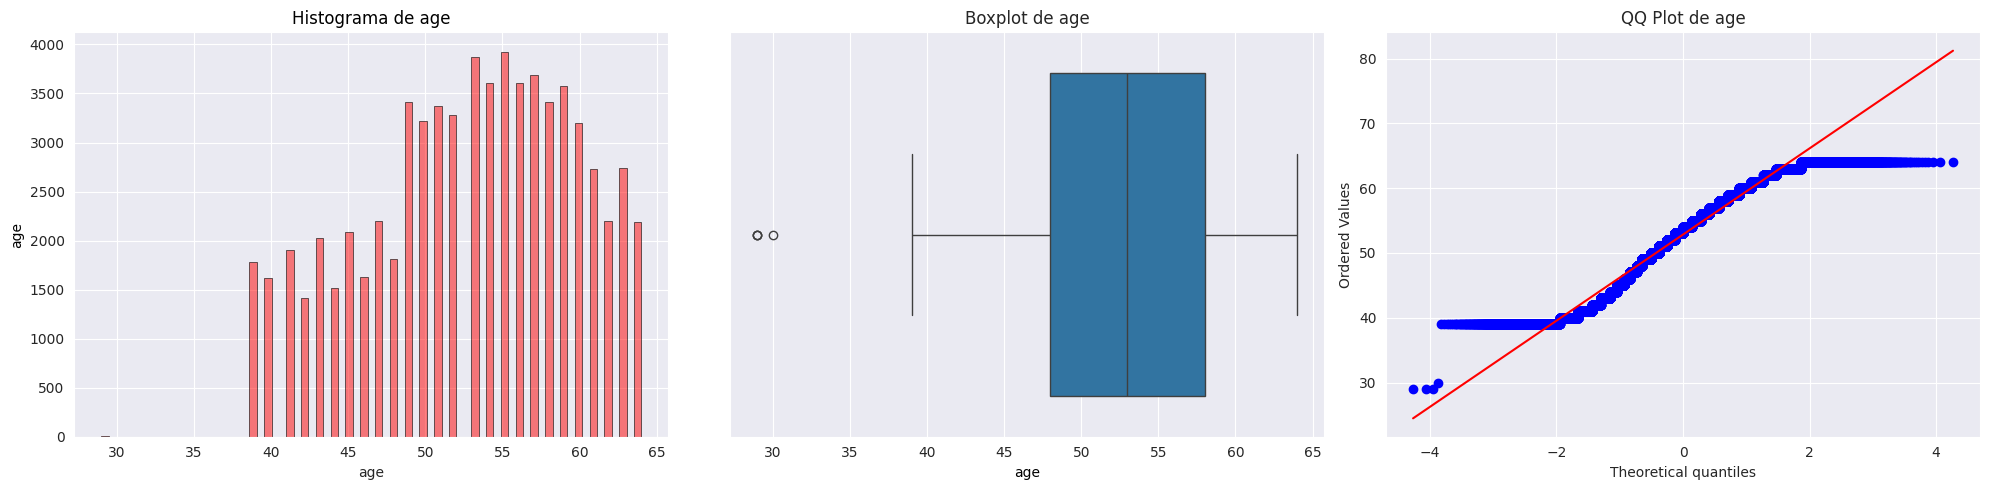

In [73]:
################################################################
# Gráfica para las columna edad #
################################################################

funciones.crear_graficos(salud_df,'age')

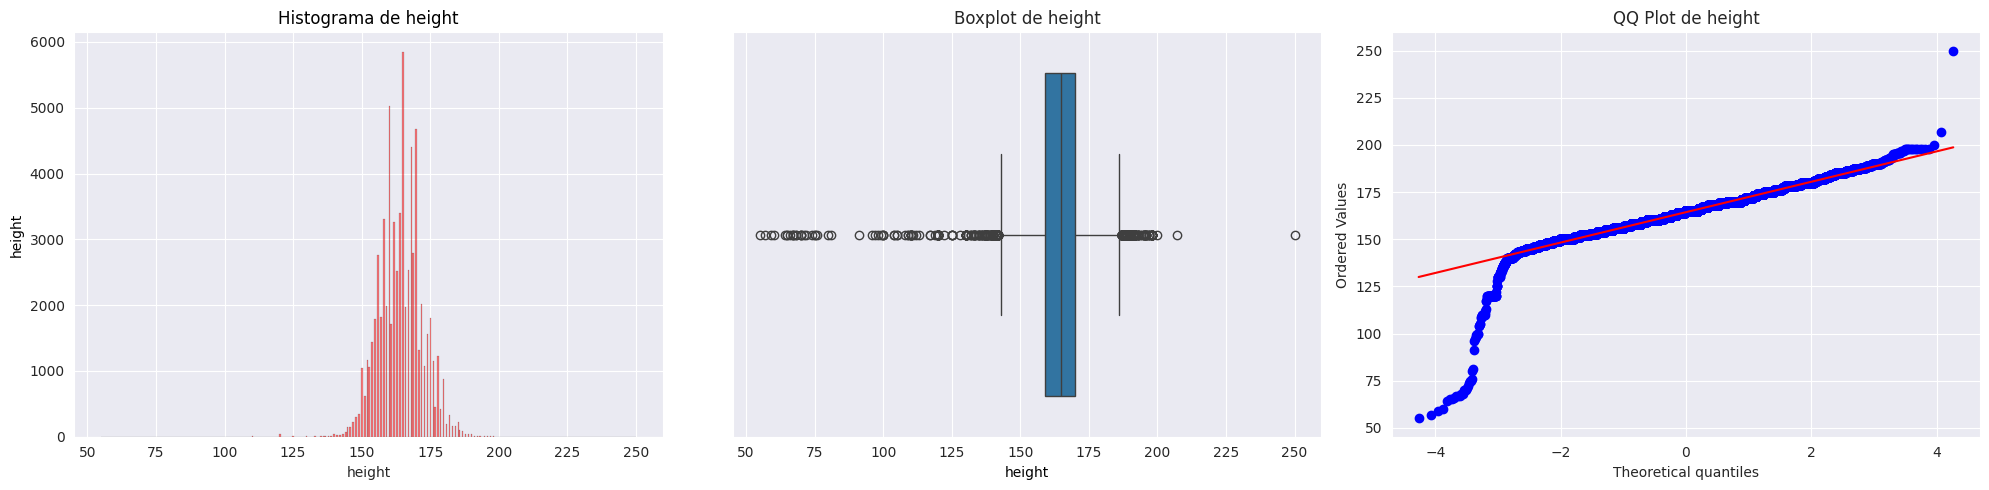

In [74]:
################################################################
# Gráfica para las columna altura
################################################################

funciones.crear_graficos(salud_df,'height')

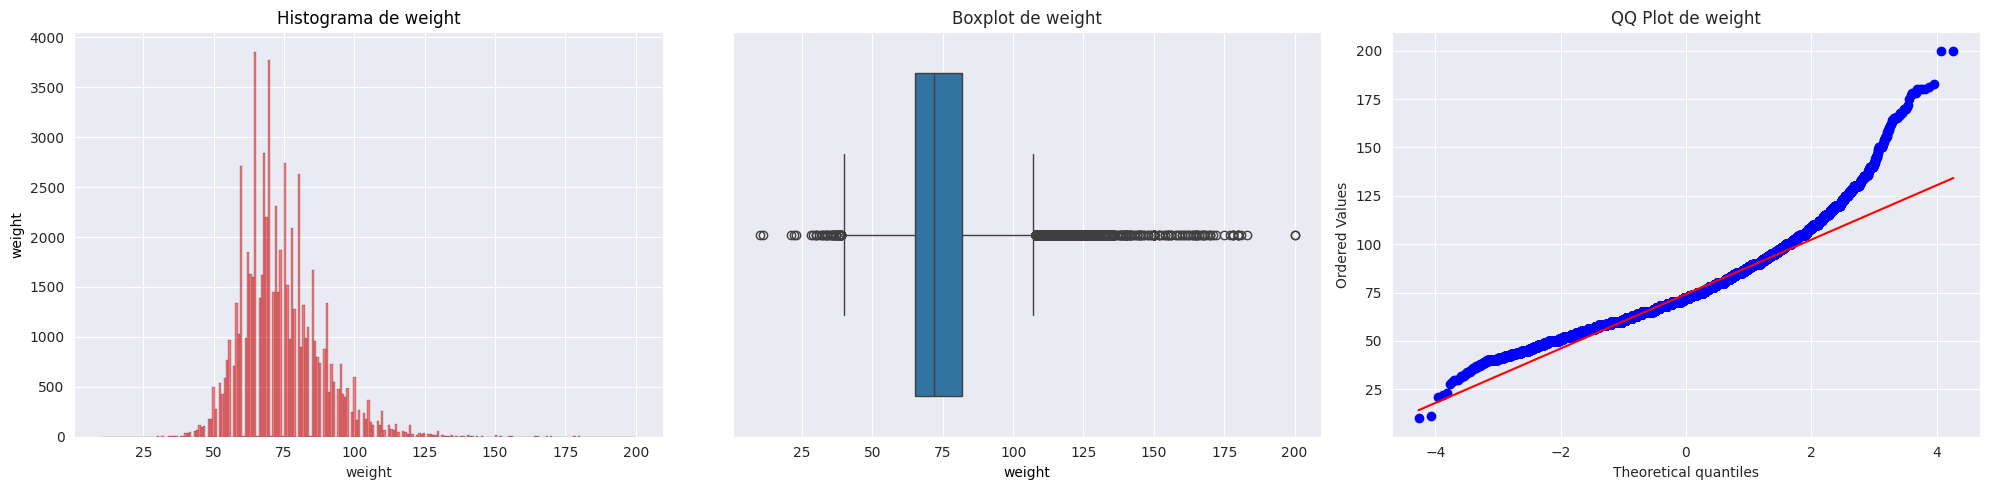

In [75]:
################################################################
# Gráfica para las columna peso #
################################################################

funciones.crear_graficos(salud_df,'weight')

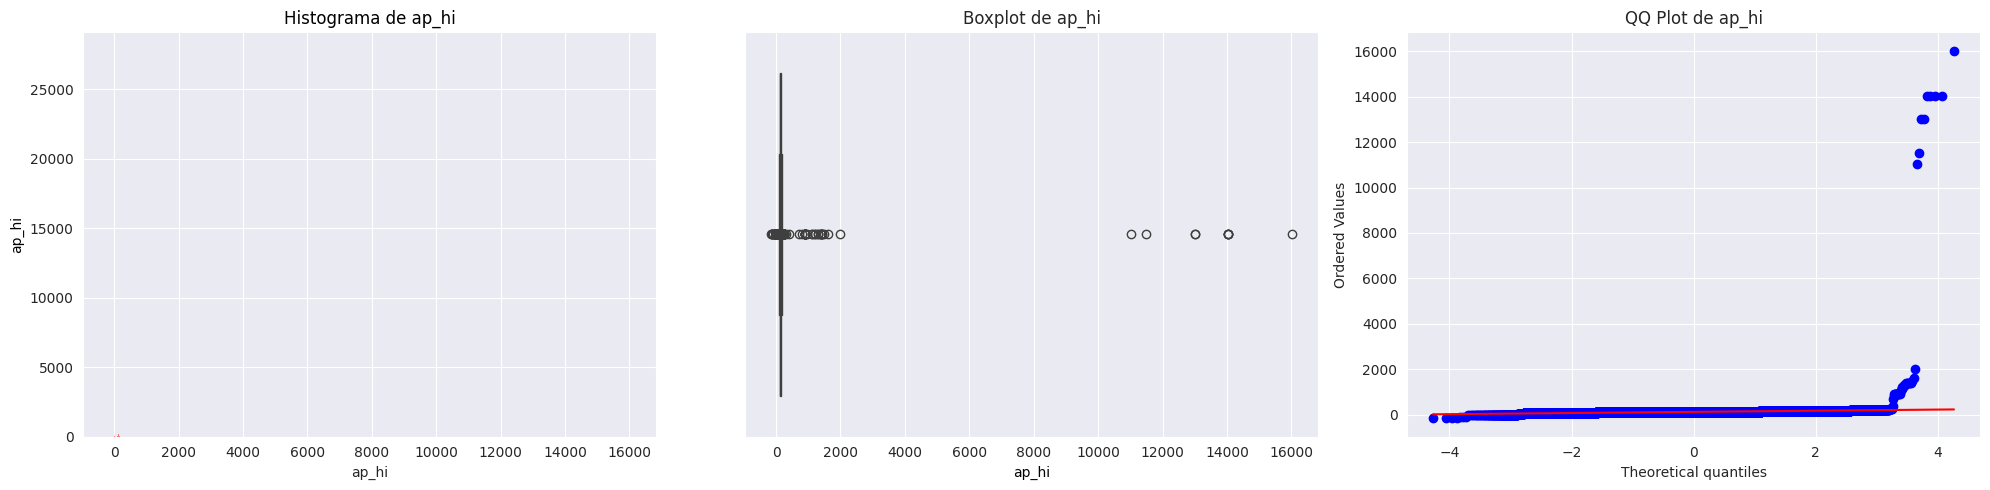

In [76]:
################################################################
# Gráfica para la columna Presión arterial sistólica #
################################################################

funciones.crear_graficos(salud_df,'ap_hi')

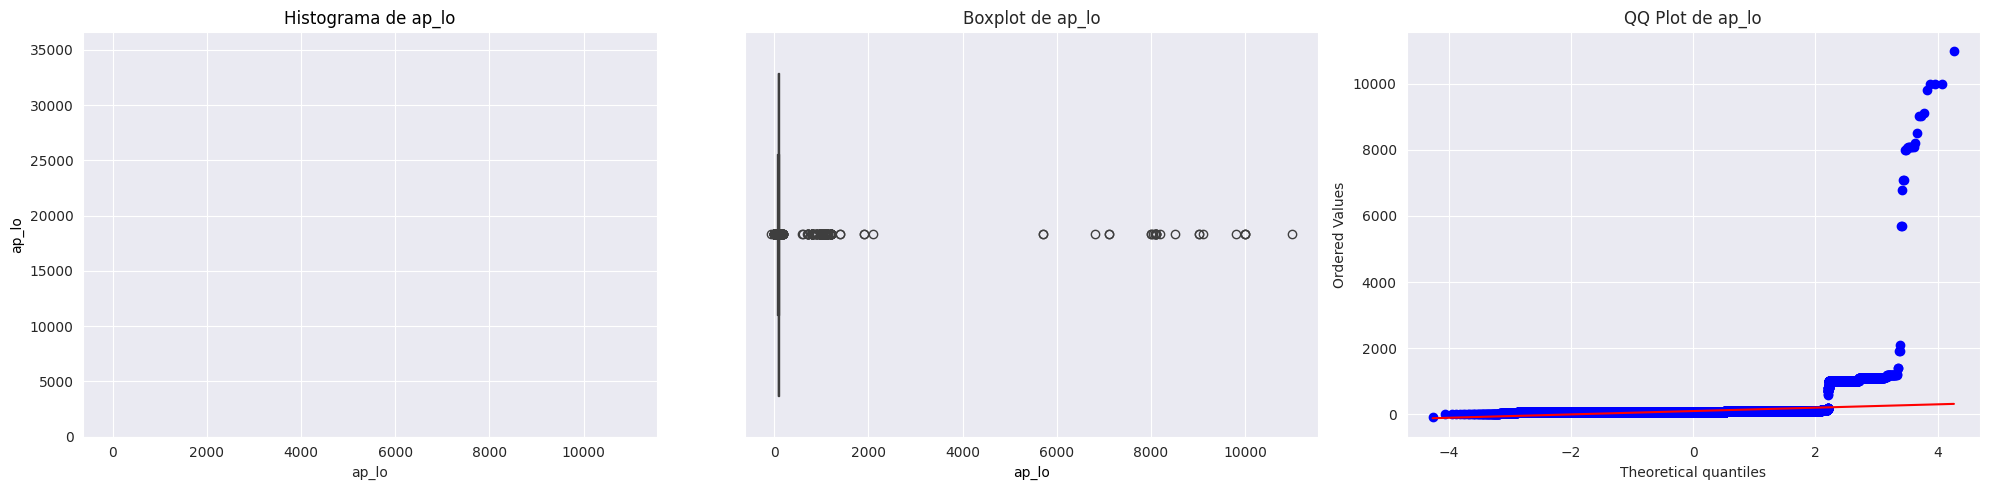

In [77]:
################################################################
# Gráfica para la columna Presión arterial diastolica #
################################################################

funciones.crear_graficos(salud_df,'ap_lo')

### Pruebas de Normalidad

In [83]:
# Aplicar la prueba de Shapiro-Wilk a cada variable
# Aunque solo es recomendable para muestras pequeñas, se realiza a modo de verificación se tendran en cuenta las  Pruebas de
# Kolmogorov y de Anderson Darlin

for variable in numericas:
    print(f'\nPrueba de Shapiro-Wilk para variable - {variable}:')
    stat, p_value = shapiro(numericas[variable])
    print('Estadístico=%.3f, p-valor=%.6f' % (stat, p_value))
    if p_value > 0.05:
        print("No se rechaza la hipótesis nula, la variable sigue una distribución normal.")
    else:
        print("Se rechaza la hipótesis nula, la variable no sigue una distribución normal.")


Prueba de Shapiro-Wilk para variable - age:
Estadístico=0.965, p-valor=0.000000
Se rechaza la hipótesis nula, la variable no sigue una distribución normal.

Prueba de Shapiro-Wilk para variable - height:
Estadístico=0.963, p-valor=0.000000
Se rechaza la hipótesis nula, la variable no sigue una distribución normal.

Prueba de Shapiro-Wilk para variable - weight:
Estadístico=0.954, p-valor=0.000000
Se rechaza la hipótesis nula, la variable no sigue una distribución normal.

Prueba de Shapiro-Wilk para variable - ap_hi:
Estadístico=0.027, p-valor=0.000000
Se rechaza la hipótesis nula, la variable no sigue una distribución normal.

Prueba de Shapiro-Wilk para variable - ap_lo:
Estadístico=0.073, p-valor=0.000000
Se rechaza la hipótesis nula, la variable no sigue una distribución normal.


In [87]:
# Prueba de Kolmogorov-Smirnov
for variable in numericas:
    print(f'\nPrueba de Kolmogorov-Smirnov para {variable}:')
    stat, p_value = kstest(numericas[variable], 'norm')
    print('Estadístico=%.3f, p-valor=%.6f' % (stat, p_value))
    if p_value > 0.05:
        print("No se rechaza la hipótesis nula: la variable sigue una distribución normal.")
    else:
        print("Se rechaza la hipótesis nula: la variable no sigue una distribución normal.")


Prueba de Kolmogorov-Smirnov para age:
Estadístico=1.000, p-valor=0.000000
Se rechaza la hipótesis nula: la variable no sigue una distribución normal.

Prueba de Kolmogorov-Smirnov para height:
Estadístico=1.000, p-valor=0.000000
Se rechaza la hipótesis nula: la variable no sigue una distribución normal.

Prueba de Kolmogorov-Smirnov para weight:
Estadístico=1.000, p-valor=0.000000
Se rechaza la hipótesis nula: la variable no sigue una distribución normal.

Prueba de Kolmogorov-Smirnov para ap_hi:
Estadístico=1.000, p-valor=0.000000
Se rechaza la hipótesis nula: la variable no sigue una distribución normal.

Prueba de Kolmogorov-Smirnov para ap_lo:
Estadístico=1.000, p-valor=0.000000
Se rechaza la hipótesis nula: la variable no sigue una distribución normal.


In [88]:
# Prueba de Anderson-Darling
for variable in numericas:
    print(f'\nPrueba de Anderson-Darling para {variable}:')
    result = anderson(numericas[variable], dist='norm')
    print('Estadístico=%.3f' % result.statistic)
    for i in range(len(result.critical_values)):
        print('Nivel de significancia=%.1f%%: estadístico crítico=%.3f' % (result.significance_level[i], result.critical_values[i]))
        if result.statistic < result.critical_values[i]:
            print('La variable, "{variable}" sigue una distribución normal')
        else:
            print('La variable "{variable}"no sigue una distribución normal')


Prueba de Anderson-Darling para age:
Estadístico=548.185
Nivel de significancia=15.0%: estadístico crítico=0.576
La variable "{variable}"no sigue una distribución normal
Nivel de significancia=10.0%: estadístico crítico=0.656
La variable "{variable}"no sigue una distribución normal
Nivel de significancia=5.0%: estadístico crítico=0.787
La variable "{variable}"no sigue una distribución normal
Nivel de significancia=2.5%: estadístico crítico=0.918
La variable "{variable}"no sigue una distribución normal
Nivel de significancia=1.0%: estadístico crítico=1.092
La variable "{variable}"no sigue una distribución normal

Prueba de Anderson-Darling para height:
Estadístico=130.665
Nivel de significancia=15.0%: estadístico crítico=0.576
La variable "{variable}"no sigue una distribución normal
Nivel de significancia=10.0%: estadístico crítico=0.656
La variable "{variable}"no sigue una distribución normal
Nivel de significancia=5.0%: estadístico crítico=0.787
La variable "{variable}"no sigue una d

### Analisis Bivariado

In [78]:
######################################################################################
# Tabla de la correlacción de las variables númericas del curso de álgebra vectorial #
######################################################################################
correlation_matrix = numericas.corr()
correlation_matrix

,age,height,weight,ap_hi,ap_lo
age,1.000000,-0.081506,0.053561,0.020854,0.017620
height,-0.081506,1.000000,0.290968,0.005488,0.006150
weight,0.053561,0.290968,1.000000,0.030702,0.043710
ap_hi,0.020854,0.005488,0.030702,1.000000,0.016086
ap_lo,0.017620,0.006150,0.043710,0.016086,1.000000


Text(77.78159722222227, 0.5, 'Variables')

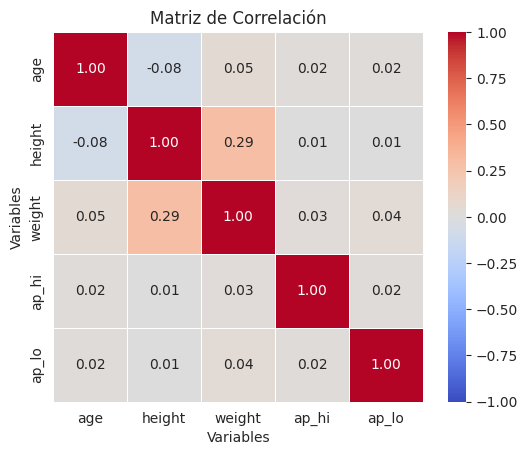

In [80]:
########################################################################################
# Gráfica de la correlacción de las variables númericas del curso de álgebra vectorial #
########################################################################################
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, square=True)

# Agregar título y etiquetas
plt.title('Matriz de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')


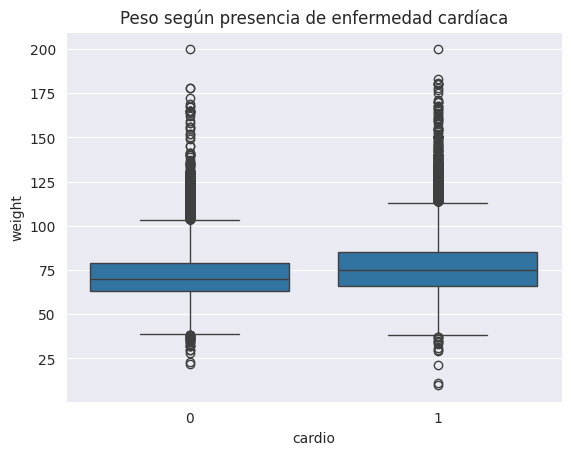

In [91]:
sns.boxplot(x='cardio', y='weight', data=salud_df)
plt.title("Peso según presencia de enfermedad cardíaca")
plt.show()

## Analisis variables categóricas

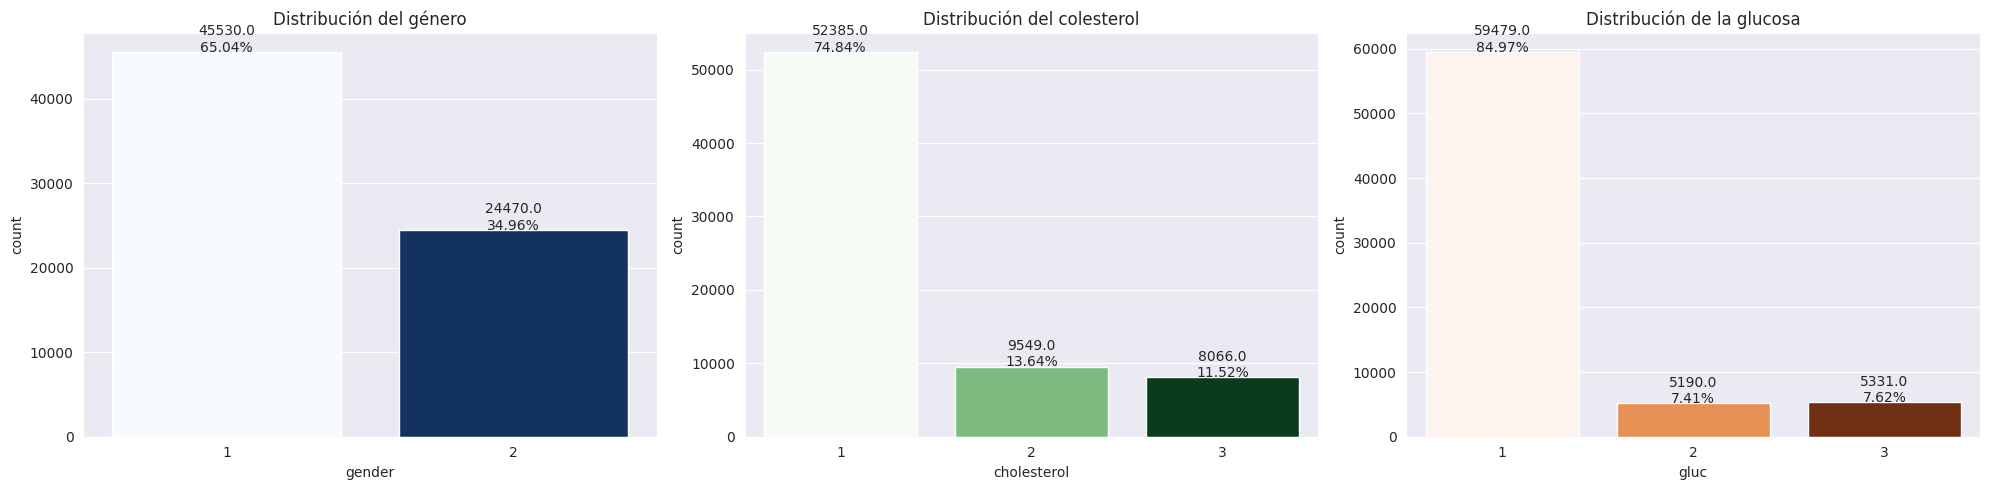

In [93]:
fig, gra = plt.subplots(ncols=3, figsize=(20, 5))

# Función para agregar etiquetas de conteo y ratio a las barras
def agregar_etiquetas_con_ratio(ax, columna):
    total = len(columna)
    for p in ax.patches:
        conteo = p.get_height()
        ratio = conteo / total
        ax.annotate(f'{conteo}\n{ratio:.2%}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9), textcoords='offset points')

# Gráfico para 'gender'
sns.countplot(x='gender', data=salud_df, ax=gra[0],hue="gender" ,palette='Blues', legend=False)
gra[0].set_title('Distribución del género')
agregar_etiquetas_con_ratio(gra[0], salud_df['gender'])

# Gráfico para 'cholesterol"
sns.countplot(x='cholesterol', data=salud_df, ax=gra[1], hue="cholesterol",palette='Greens',legend=False)
gra[1].set_title('Distribución del colesterol')
agregar_etiquetas_con_ratio(gra[1], salud_df['cholesterol'])

# Gráfico para glucosa
sns.countplot(x='gluc', data=salud_df, ax=gra[2], hue="gluc",palette='Oranges', legend=False)
gra[2].set_title('Distribución de la glucosa')
agregar_etiquetas_con_ratio(gra[2], salud_df['gluc'])

plt.tight_layout()
plt.show()


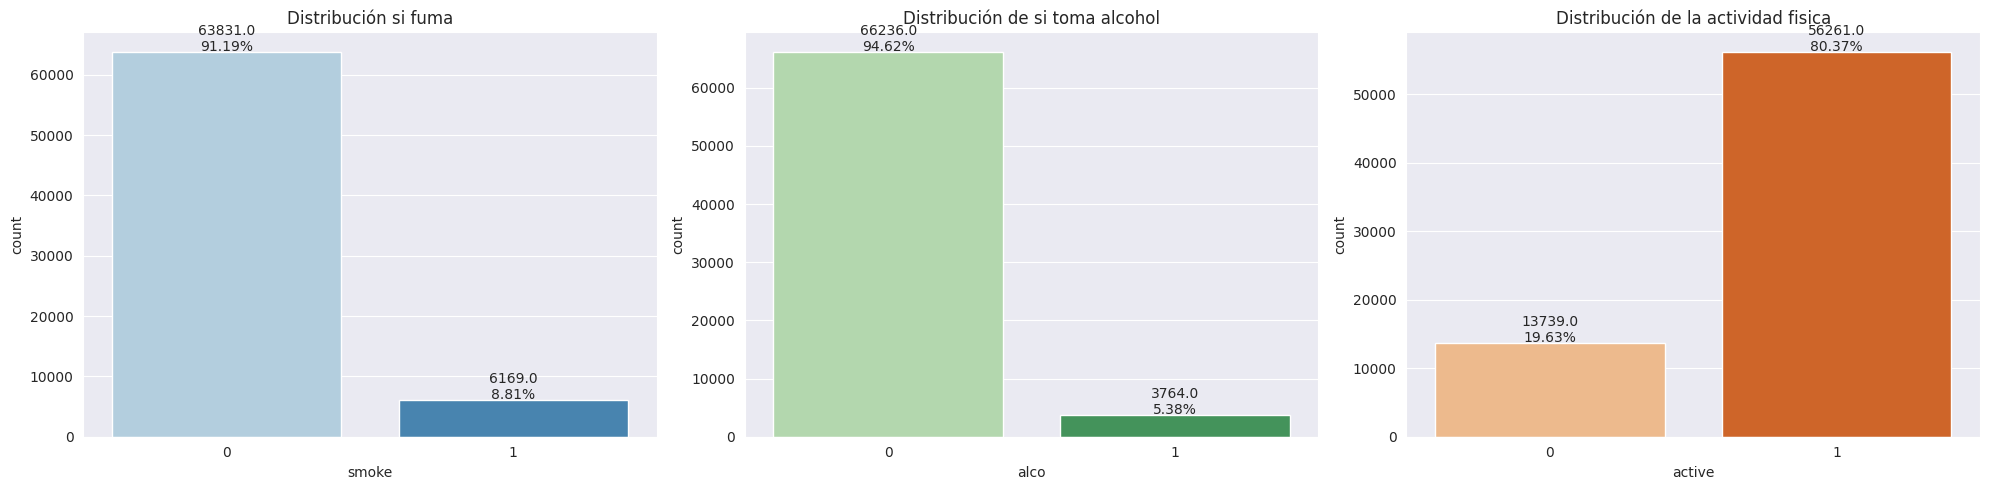

In [96]:
fig, gra = plt.subplots(ncols=3, figsize=(20, 5))

# Gráfico para 'smoke'
sns.countplot(x='smoke', data=salud_df, ax=gra[0],hue="smoke" ,palette='Blues', legend=False)
gra[0].set_title('Distribución si fuma')
agregar_etiquetas_con_ratio(gra[0], salud_df['smoke'])

# Gráfico para 'alcohol
sns.countplot(x='alco', data=salud_df, ax=gra[1], hue="alco",palette='Greens',legend=False)
gra[1].set_title('Distribución de si toma alcohol')
agregar_etiquetas_con_ratio(gra[1], salud_df['alco'])

# Gráfico para active
sns.countplot(x='active', data=salud_df, ax=gra[2], hue="active",palette='Oranges', legend=False)
gra[2].set_title('Distribución de la actividad fisica')
agregar_etiquetas_con_ratio(gra[2], salud_df['active'])

plt.tight_layout()
plt.show()


### Variable Objetivo

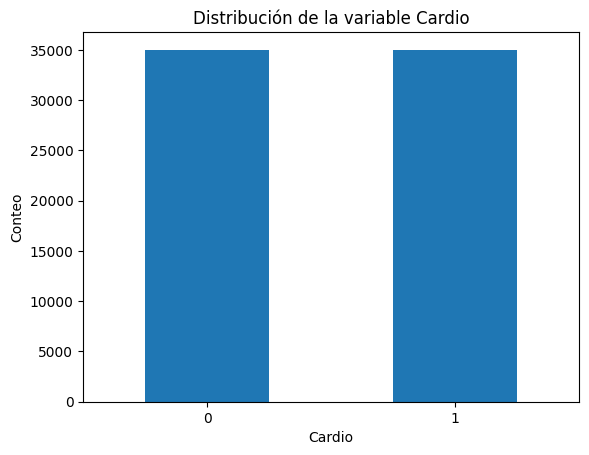

In [ ]:
import matplotlib.pyplot as plt

df2['cardio'].value_counts().plot(kind='bar')
plt.title('Distribución de la variable Cardio')
plt.xlabel('Cardio')
plt.ylabel('Conteo')
plt.xticks(rotation=0) # Para que las etiquetas del eje x no estén rotadas
plt.show()

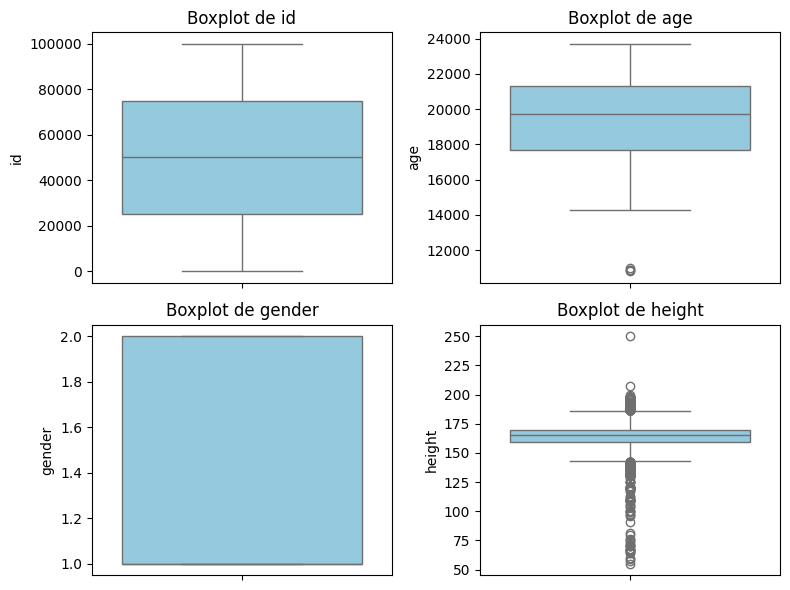

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))  # 2 filas y 2 columnas

axes = axes.flatten()

# Crear un boxplot para cada variable numérica
for ax, col in zip(axes, numericas.columns):
    sns.boxplot(y=df2[col], ax=ax, color='skyblue')
    ax.set_title(f'Boxplot de {col}')
    ax.set_ylabel(col)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()

In [20]:
for col in numericas.columns:
    # Calcular z-score para cada columna y obtener su valor absoluto
    z_scores = zscore(df2[col])
    abs_z_scores = np.abs(z_scores)

    # Seleccionar los outliers usando un límite de 3
    outliers_zscore = df2[abs_z_scores > 3]

    # Contar el número de valores atípicos
    num_outliers = outliers_zscore[col].count()

    # Imprimir el nombre de la columna, el valor mínimo del outlier y el número de outliers
    print(f"Variable: {col}")
    print(f"Número de valores atípicos: {num_outliers}")
    if num_outliers > 0:  # Solo imprimir el valor mínimo si hay outliers
        print(f"Outlier mínimo (z-score): {outliers_zscore[col].min()}")
    print("---")

Variable: id
Número de valores atípicos: 0
---
Variable: age
Número de valores atípicos: 4
Outlier mínimo (z-score): 10798
---
Variable: gender
Número de valores atípicos: 0
---
Variable: height
Número de valores atípicos: 293
Outlier mínimo (z-score): 55
---
Variable: weight
Número de valores atípicos: 702
Outlier mínimo (z-score): 10.0
---
Variable: ap_hi
Número de valores atípicos: 38
Outlier mínimo (z-score): 701
---
Variable: ap_lo
Número de valores atípicos: 951
Outlier mínimo (z-score): 700
---
Variable: cholesterol
Número de valores atípicos: 0
---
Variable: gluc
Número de valores atípicos: 5331
Outlier mínimo (z-score): 3
---
Variable: smoke
Número de valores atípicos: 6169
Outlier mínimo (z-score): 1
---
Variable: alco
Número de valores atípicos: 3764
Outlier mínimo (z-score): 1
---
Variable: active
Número de valores atípicos: 0
---
Variable: cardio
Número de valores atípicos: 0
---
